<h1 style=color:#3498DB>Convolutions and Pooling</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [3]:
def convolutionmodel():
    
    # Define the model
    model = keras.models.Sequential([   
                                     keras.Input(shape=(28, 28, 1)),
        
                                     # Add convolutions and max pooling
                                     keras.layers.Conv2D(32, (3,3), activation='relu'),
                                     keras.layers.MaxPooling2D(2, 2),
                                     keras.layers.Conv2D(32, (3,3), activation='relu'),
                                     keras.layers.MaxPooling2D(2,2),

                                     # Add the same layers as before
                                     keras.layers.Flatten(),
                                     keras.layers.Dense(128, activation='relu'),
                                     keras.layers.Dense(10, activation='softmax')
                                     ])

    # Use same settings
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    print(f'\nMODEL TRAINING:')
    model.fit(training_images, training_labels, epochs=5)
    
    return model

model = convolutionmodel()


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4614 - accuracy: 0.8326
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3131 - accuracy: 0.8848
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2704 - accuracy: 0.8996
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2417 - accuracy: 0.9100
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2192 - accuracy: 0.9165


In [4]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

<h3 style=color:#3498DB>Evaluate on the test set</h3>

In [5]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.2689 - accuracy: 0.9022


In [6]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

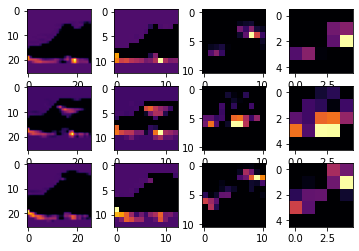

In [10]:
f, axarr = plt.subplots(3,4)

for x in range(0,4):
    f1 = activation_model.predict(test_images[0].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, 0], cmap='inferno')
    axarr[0,x].grid(False)
  
    f2 = activation_model.predict(test_images[23].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, 0], cmap='inferno')
    axarr[1,x].grid(False)
  
    f3 = activation_model.predict(test_images[28].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, 0], cmap='inferno')
    axarr[2,x].grid(False)